<a href="https://colab.research.google.com/github/ulrikSebastienR/2021-Coding-Basic/blob/main/PCA_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  calory breakfast lunch dinner exercise body_shape
0   1200         1     0      0        2     Skinny
1   2800         1     1      1        1     Normal
2   3500         2     2      1        0        Fat
3   1400         0     1      0        3     Skinny
4   5000         2     2      2        0        Fat
5   1300         0     0      1        2     Skinny
6   3000         1     0      1        1     Normal
7   4000         2     2      2        0        Fat
8   2600         0     2      0        0     Normal
9   3000         1     2      1        1        Fat
  calory breakfast lunch dinner exercise
0   1200         1     0      0        2
1   2800         1     1      1        1
2   3500         2     2      1        0
3   1400         0     1      0        3
4   5000         2     2      2        0
5   1300         0     0      1        2
6   3000         1     0      1        1
7   4000         2     2      2        0
8   2600         0     2      0        0
9   3000         1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

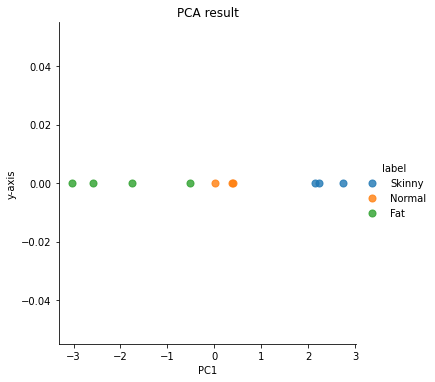

In [1]:
#https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb
#without sklearn, direct implementation
import pandas as pd
df = pd.DataFrame(columns=["calory","breakfast","lunch","dinner","exercise","body_shape"])

df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']
print(df.head(10))

X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
y = df[['body_shape']]
print(X)
print(y)

from sklearn.preprocessing import StandardScaler

#print(StandardScaler)
x_std = StandardScaler().fit_transform(X)
print(x_std)

#Co-variance matrix of features
import numpy as np
features = x_std.T
print(features)
print(np.cov(features))

eigenvalues, eigenvectors = np.linalg.eig(np.cov(features))
print(eigenvalues)
print(eigenvectors)

#we take only first eigenvalues as it is most significant component.
print(eigenvalues[0])
print(eigenvalues[0]/sum(eigenvalues))

#project data point onto selected eigenvector
projected_X = np.dot(x_std, eigenvectors.T[0])
print(projected_X)

result = pd.DataFrame(projected_X, columns = ["PC1"])
result["y-axis"] = 0.0
result["label"] = y
print(result)

import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

# title
plt.title('PCA result')




In [12]:
# sklearn implementation
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
print(pca)
pca_x = pca.fit_transform(x_std)
print(pca_x)
print(type(pca_x))

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)
[[-2.22600943]
 [-0.0181432 ]
 [ 1.76296611]
 [-2.73542407]
 [ 3.02711544]
 [-2.14702579]
 [-0.37142473]
 [ 2.59239883]
 [-0.39347815]
 [ 0.50902498]]
<class 'numpy.ndarray'>


In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
print("components", pca.components_)
print("explained variance", pca.explained_variance_)
print("explained variance ratio", pca.explained_variance_ratio_)
print("singular values", pca.singular_values_, "\n", "number of features", pca.n_features_, "\n", "number of samples", pca.n_samples_, "\n","number of components", pca.n_components_, "\n", "noise_variance", pca.noise_variance_, "\n", "mean", pca.mean_ )
# Note that none of these values can be computed on pca_x.

components [[ 0.508005    0.44660335  0.38377913  0.42845209 -0.46002038]]
explained variance [4.0657343]
explained variance ratio [0.73183217]
singular values [6.04909982] 
 number of features 5 
 number of samples 10 
 number of components 1 
 noise_variance 0.37245531507950796 
 mean [1.38777878e-17 0.00000000e+00 1.11022302e-16 2.77555756e-18
 0.00000000e+00]


In [17]:
sk_result = pd.DataFrame(pca_x, columns=["PC1"])
print(type(sk_result))
print(sk_result)


<class 'pandas.core.frame.DataFrame'>
        PC1
0 -2.226009
1 -0.018143
2  1.762966
3 -2.735424
4  3.027115
5 -2.147026
6 -0.371425
7  2.592399
8 -0.393478
9  0.509025


In [18]:
sk_result["y-axis"] = 0.0
sk_result["label"] = y
print(type(sk_result))
print(sk_result)


<class 'pandas.core.frame.DataFrame'>
        PC1  y-axis   label
0 -2.226009     0.0  Skinny
1 -0.018143     0.0  Normal
2  1.762966     0.0     Fat
3 -2.735424     0.0  Skinny
4  3.027115     0.0     Fat
5 -2.147026     0.0  Skinny
6 -0.371425     0.0  Normal
7  2.592399     0.0     Fat
8 -0.393478     0.0  Normal
9  0.509025     0.0     Fat


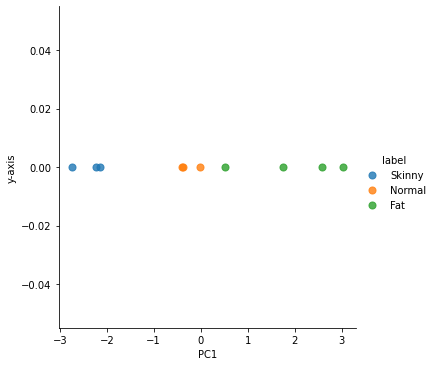

In [23]:
sns.lmplot(x="PC1",y="y-axis",data=sk_result,fit_reg=False,
           scatter_kws = {"s": 50},           #marker-size
           hue="label")